# Outliers

In [18]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [19]:
# Import Boston house-price dataset from sklearn 
boston = datasets.load_boston()
# Get data from the boston class
boston_df = pd.DataFrame(boston.data)
# Get features from the boston class
boston_df.columns = boston.feature_names
# Target value MEDV missing
boston_df['MEDV'] = boston.target

In [20]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
# Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
# From the description we can see that there is no missing values. Can also use
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Box plot

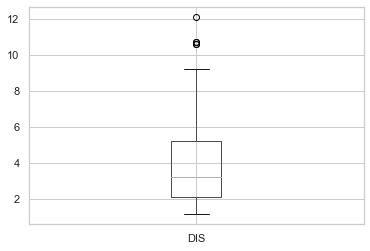

In [23]:
# Check for outliers using only the DIS feature
boston_df.boxplot('DIS')

 A box plot will show the outliers as dots and we see three of them here between 10 and 12

## Histogram

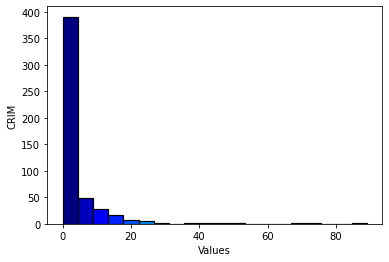

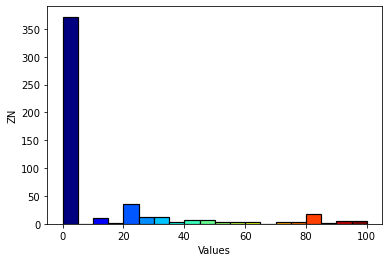

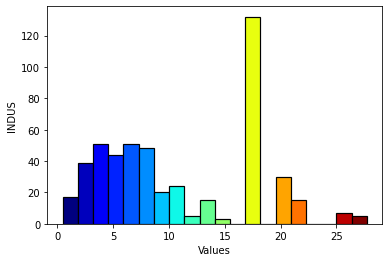

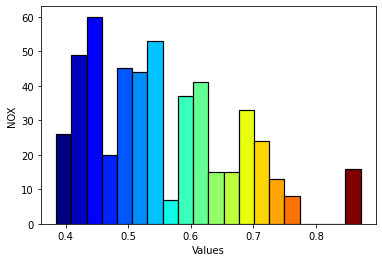

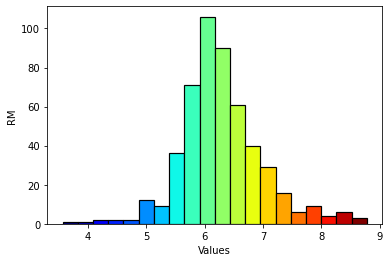

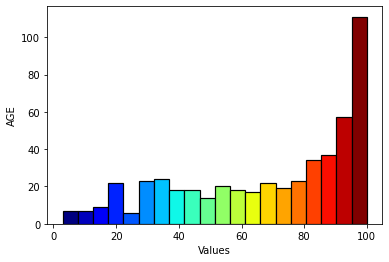

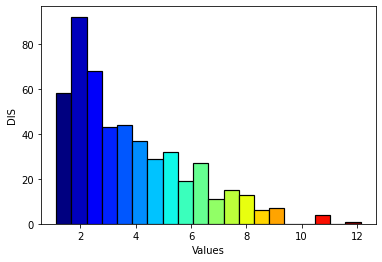

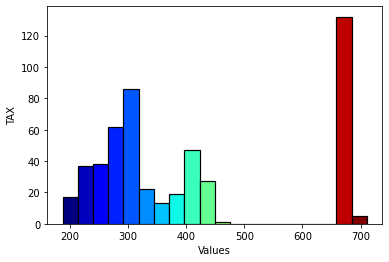

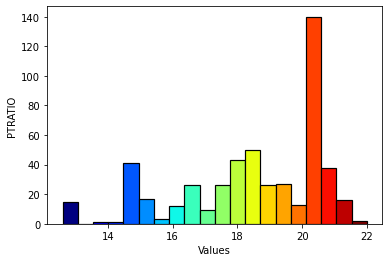

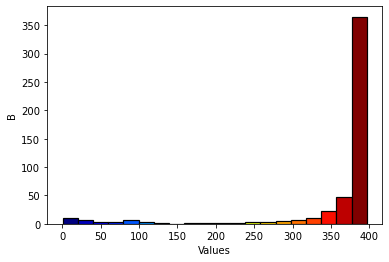

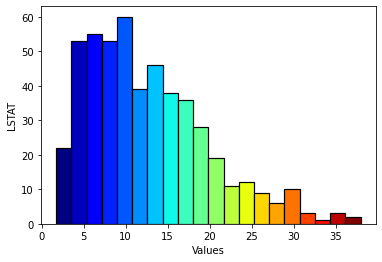

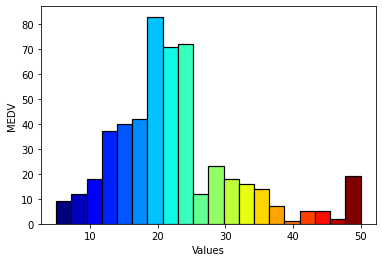

In [14]:
# Function for plotting all histograms
def show_hists(data, indx):
    n_bins = 20
    jet = plt.get_cmap('jet', n_bins)
    for ind in indx:
        s = data[data.columns[ind]].values
        plt.figure()
        _, _, patches = plt.hist(s, bins=n_bins, edgecolor='black', linewidth=1.2)
        for i in range(n_bins):
            patches[i].set_facecolor(jet(i))
        plt.xlabel('Values')
        plt.ylabel(data.columns[ind])
    plt.show()
    
indices = [0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13]

show_hists(boston_df, indices)

## Scatter plot

Text(0, 0.5, 'TAX')

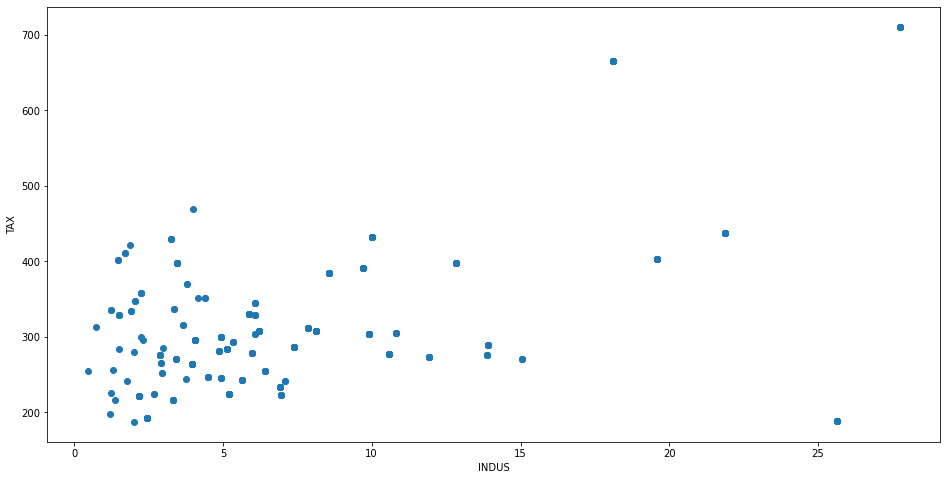

In [15]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('INDUS')
ax.set_ylabel('TAX')

Most of the data are clustered at the bottom left side and a few outlier points at the top right corner

## Scatter plot and histogram

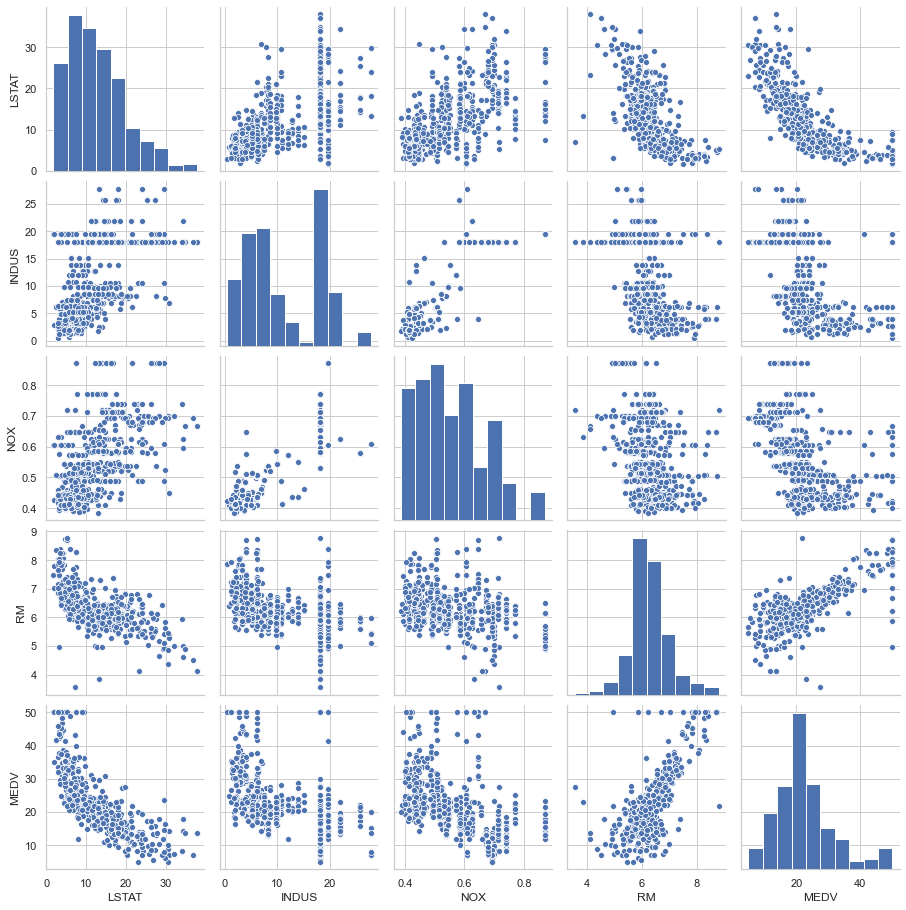

In [16]:
sns.set(style='whitegrid',context='notebook')
cols=['LSTAT','INDUS','NOX','RM', 'MEDV']
sns.pairplot(boston_df[cols],size=2.5)

## Feature scaling

In [17]:
standarization = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
boston_array = standarization.fit_transform(boston_df)
#boston_array = minmax_scaler.fit_transform(boston_df)
#boston_array = robust_scaler.fit_transform(boston_df)

# the fit_transform returns a ndarray so if we want a DataFrame we must transform it back
boston_df = pd.DataFrame(boston_array)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
